# Hand Gesture Recognition from EMG Signals

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d kyr7plus/emg-4

Dataset URL: https://www.kaggle.com/datasets/kyr7plus/emg-4
License(s): CC0-1.0
100%|█████████████████████████████████████████| 868k/868k [00:01<00:00, 513kB/s]
100%|█████████████████████████████████████████| 868k/868k [00:01<00:00, 513kB/s]


In [4]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Hand Gesture Recognition from EMG Signals/emg-4.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Hand Gesture Recognition from EMG Signals')
zip_ref.close()

## Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
df0 = pd.read_csv('0.csv')
df1 = pd.read_csv('1.csv')
df2 = pd.read_csv('2.csv')
df3 = pd.read_csv('3.csv')

In [27]:
df = pd.concat([df0,df1,df2,df3], axis = 0)

In [4]:
df.head()

26.0  4.0  5.0   8.0  -1.0  -13.0  -109.0  -66.0  -9.0  2.0  ...  -29.0  \
0 -47.0 -6.0 -5.0  -7.0  13.0   -1.0    35.0  -10.0  10.0 -4.0  ...    NaN   
1 -19.0 -8.0 -8.0  -8.0 -21.0   -6.0   -79.0   12.0   0.0  5.0  ...    NaN   
2   2.0  3.0  0.0   2.0   0.0   22.0   106.0  -14.0 -16.0 -2.0  ...    NaN   
3   6.0  0.0  0.0  -2.0 -14.0   10.0   -51.0    5.0   7.0  0.0  ...    NaN   
4  15.0 -5.0 -5.0 -15.0  12.0  -22.0   -38.0   36.0   9.0  6.0  ...    NaN   

   0.0.3  7.0.1  7.0.2  -15.0.1  -6.0.3  25.0  1.0.5  1.0.6   3  
0    NaN    NaN    NaN      NaN     NaN   NaN    NaN    NaN NaN  
1    NaN    NaN    NaN      NaN     NaN   NaN    NaN    NaN NaN  
2    NaN    NaN    NaN      NaN     NaN   NaN    NaN    NaN NaN  
3    NaN    NaN    NaN      NaN     NaN   NaN    NaN    NaN NaN  
4    NaN    NaN    NaN      NaN     NaN   NaN    NaN    NaN NaN  

[5 rows x 156 columns]

In [5]:
df.shape

(11674, 156)

In [6]:
df.size

1821144

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11674 entries, 0 to 2920
Columns: 156 entries, 26.0 to 3
dtypes: float64(156)
memory usage: 14.0 MB


In [8]:
df.describe().T

count      mean        std    min   25%  50%   75%    max
26.0     5830.0 -0.968096  29.583934 -122.0 -18.0 -2.0  13.0  127.0
4.0     11674.0 -0.759637  12.393667 -121.0  -5.0 -1.0   3.0  100.0
5.0     11674.0 -0.554309  13.627864 -105.0  -6.0 -1.0   5.0   95.0
8.0      5811.0 -0.316985  18.104954 -103.0  -8.0  0.0   9.0   90.0
-1.0     8732.0 -0.482364   8.981817  -75.0  -4.0 -1.0   3.0   65.0
...         ...       ...        ...    ...   ...  ...   ...    ...
-6.0.3   2921.0 -0.819925   4.724219  -54.0  -3.0 -1.0   1.0   35.0
25.0     2921.0 -0.580281  32.935353 -128.0 -21.0 -1.0  18.0  127.0
1.0.5    2921.0 -0.768230   9.344805  -51.0  -6.0 -1.0   4.0   48.0
1.0.6    2921.0 -0.409449  11.974978  -57.0  -7.0 -1.0   5.0   68.0
3        2921.0  3.000000   0.000000    3.0   3.0  3.0   3.0    3.0

[156 rows x 8 columns]

In [9]:
df.isnull().sum()

26.0      5844
4.0          0
5.0          0
8.0       5863
-1.0      2942
          ... 
-6.0.3    8753
25.0      8753
1.0.5     8753
1.0.6     8753
3         8753
Length: 156, dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

26.0      211
4.0       156
5.0       155
8.0       157
-1.0      102
         ... 
-6.0.3     51
25.0      204
1.0.5      76
1.0.6      92
3           1
Length: 156, dtype: int64

## Data Visualization

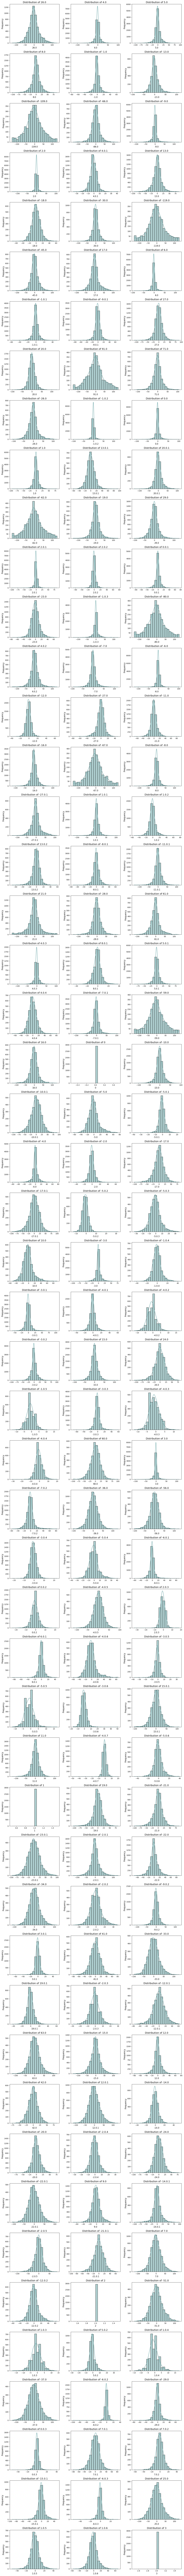

In [17]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

## Data Preprocessing

In [29]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [32]:
# Ensure column names are unique
df.columns = range(df.shape[1])

# Slice the dataframe
X = df.loc[:, 0:63]
y = df[64]

In [33]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [34]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [36]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


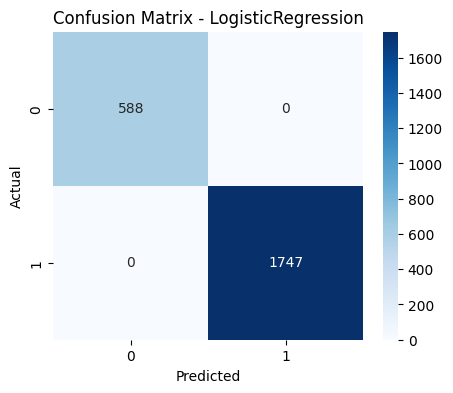

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


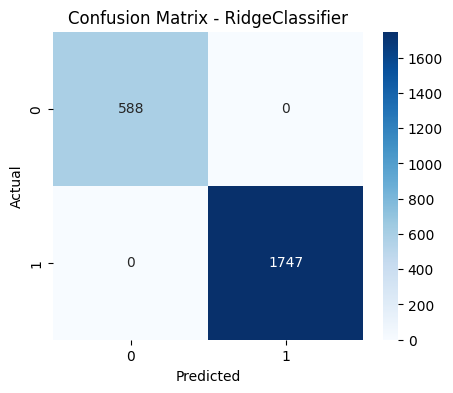

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


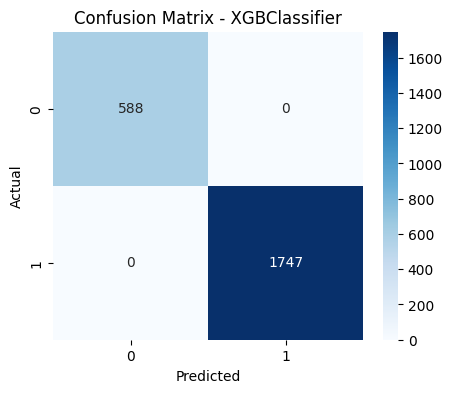

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


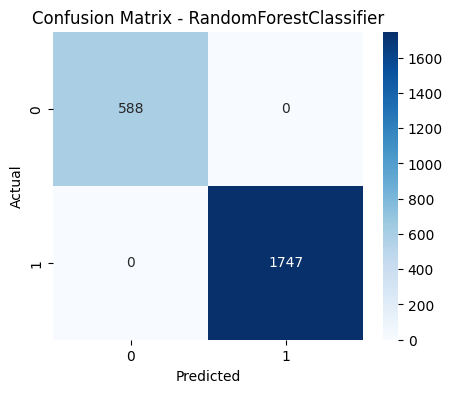

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


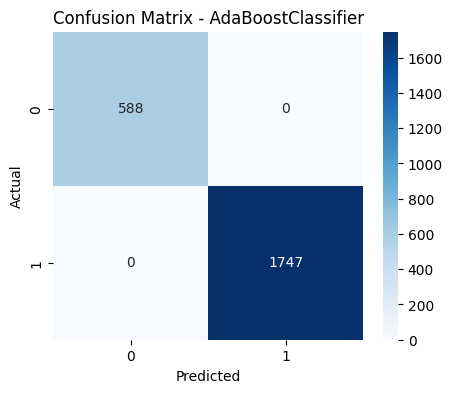

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


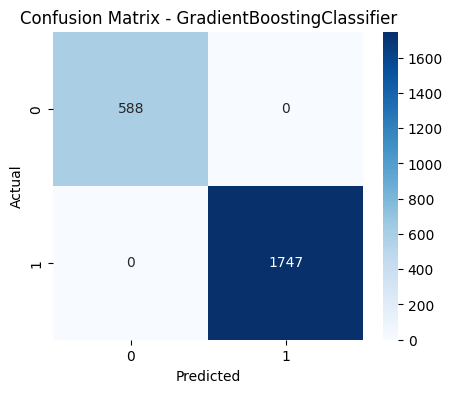

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


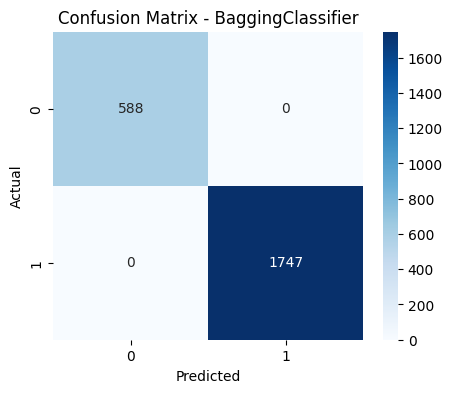

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


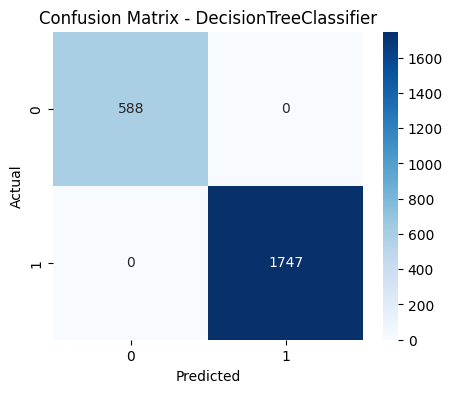

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       588
           1       1.00      1.00      1.00      1747

    accuracy                           1.00      2335
   macro avg       1.00      1.00      1.00      2335
weighted avg       1.00      1.00      1.00      2335

Confusion Matrix:
 [[ 588    0]
 [   0 1747]]


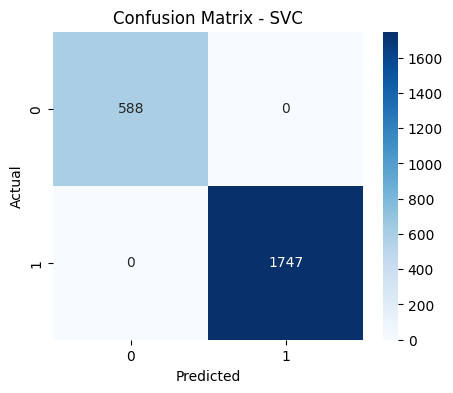

In [37]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()